In [326]:
import pandas as pd
import numpy as np


In [327]:
import cv2
import pathlib
import imageio
from skimage.transform import resize

#converting normal images into numpy array

training_paths = pathlib.Path('../input/chest-xray-pneumonia/chest_xray').glob('train/NORMAL/*.jpeg')
training_sorted = sorted([x for x in training_paths])

training_images = np.zeros(2352)
for index in range(301):
    im_path = training_sorted[index]
    img = cv2.imread(str(im_path))
    res = cv2.resize(img, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
    res = res.flatten()
    training_images = np.vstack((training_images, res))
    


In [328]:
#converting pneumonia images into numpy array

training_paths = pathlib.Path('../input/chest-xray-pneumonia/chest_xray').glob('train/PNEUMONIA/*.jpeg')
training_sorted = sorted([x for x in training_paths])

training_images_affected = np.zeros(2352)
for index in range(301):
    im_path = training_sorted[index]
    img = cv2.imread(str(im_path))
    res = cv2.resize(img, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
    res = res.flatten()
    training_images_affected = np.vstack((training_images_affected, res))
    

In [329]:
#copying and removing unnecessary rows


train_images_dummy = training_images
train_images_aff_dummy = training_images_affected

train_images_dummy = train_images_dummy[2:]
train_images_aff_dummy = train_images_aff_dummy[2:]

In [330]:
#concatenating the pixel values into the data frame


dfcop = train_images_dummy
dfcop = np.concatenate([dfcop, train_images_aff_dummy])


df_images = pd.DataFrame(dfcop)
df_images = pd.DataFrame(df_images.loc[:, :])

In [331]:
#copying to a new dataframe

df = pd.DataFrame(df_images)
df = pd.DataFrame(df.loc[:, :])


In [332]:
df

,0,1,2,3,4,5,6,7,8,9,...,2342,2343,2344,2345,2346,2347,2348,2349,2350,2351
0,32.0,32.0,32.0,57.0,57.0,57.0,103.0,103.0,103.0,121.0,...,107.0,88.0,88.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,54.0,54.0,54.0,80.0,80.0,80.0,83.0,...,133.0,86.0,86.0,86.0,0.0,0.0,0.0,0.0,0.0,0.0
2,50.0,50.0,50.0,79.0,79.0,79.0,101.0,101.0,101.0,114.0,...,154.0,74.0,74.0,74.0,0.0,0.0,0.0,11.0,11.0,11.0
3,89.0,89.0,89.0,56.0,56.0,56.0,42.0,42.0,42.0,47.0,...,119.0,141.0,141.0,141.0,41.0,41.0,41.0,0.0,0.0,0.0
4,59.0,59.0,59.0,81.0,81.0,81.0,148.0,148.0,148.0,144.0,...,168.0,138.0,138.0,138.0,76.0,76.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,54.0,54.0,54.0,136.0,136.0,136.0,153.0,153.0,153.0,122.0,...,149.0,23.0,23.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0
596,40.0,40.0,40.0,108.0,108.0,108.0,97.0,97.0,97.0,69.0,...,76.0,18.0,18.0,18.0,36.0,36.0,36.0,36.0,36.0,36.0
597,0.0,0.0,0.0,24.0,24.0,24.0,61.0,61.0,61.0,78.0,...,131.0,58.0,58.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0
598,0.0,0.0,0.0,0.0,0.0,0.0,58.0,58.0,58.0,78.0,...,148.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [333]:
#adding target column

normal = 300
affected = 300

temp = pd.DataFrame()
temp = np.ones(normal)
temp = np.concatenate([temp, np.zeros(affected)])
temp = pd.DataFrame(temp) 


# df = pd.DataFrame(temp)
# df = pd.DataFrame(df.loc[:, 0])
# df.columns = ['target']
# df.target.value_counts()

df['target'] = pd.DataFrame(temp)

In [334]:
df

,0,1,2,3,4,5,6,7,8,9,...,2343,2344,2345,2346,2347,2348,2349,2350,2351,target
0,32.0,32.0,32.0,57.0,57.0,57.0,103.0,103.0,103.0,121.0,...,88.0,88.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,54.0,54.0,54.0,80.0,80.0,80.0,83.0,...,86.0,86.0,86.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,50.0,50.0,50.0,79.0,79.0,79.0,101.0,101.0,101.0,114.0,...,74.0,74.0,74.0,0.0,0.0,0.0,11.0,11.0,11.0,1.0
3,89.0,89.0,89.0,56.0,56.0,56.0,42.0,42.0,42.0,47.0,...,141.0,141.0,141.0,41.0,41.0,41.0,0.0,0.0,0.0,1.0
4,59.0,59.0,59.0,81.0,81.0,81.0,148.0,148.0,148.0,144.0,...,138.0,138.0,138.0,76.0,76.0,76.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,54.0,54.0,54.0,136.0,136.0,136.0,153.0,153.0,153.0,122.0,...,23.0,23.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
596,40.0,40.0,40.0,108.0,108.0,108.0,97.0,97.0,97.0,69.0,...,18.0,18.0,18.0,36.0,36.0,36.0,36.0,36.0,36.0,0.0
597,0.0,0.0,0.0,24.0,24.0,24.0,61.0,61.0,61.0,78.0,...,58.0,58.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
598,0.0,0.0,0.0,0.0,0.0,0.0,58.0,58.0,58.0,78.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [335]:
#shuffling the rows

df = df.sample(frac=1, axis=0).reset_index(drop=True)
df

,0,1,2,3,4,5,6,7,8,9,...,2343,2344,2345,2346,2347,2348,2349,2350,2351,target
0,45.0,45.0,45.0,48.0,48.0,48.0,55.0,55.0,55.0,75.0,...,29.0,29.0,29.0,32.0,32.0,32.0,34.0,34.0,34.0,0.0
1,143.0,143.0,143.0,83.0,83.0,83.0,82.0,82.0,82.0,76.0,...,164.0,164.0,164.0,83.0,83.0,83.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,24.0,24.0,24.0,61.0,61.0,61.0,78.0,...,58.0,58.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,55.0,55.0,55.0,64.0,64.0,64.0,66.0,66.0,66.0,65.0,...,1.0,1.0,1.0,18.0,18.0,18.0,22.0,22.0,22.0,0.0
4,94.0,94.0,94.0,67.0,67.0,67.0,56.0,56.0,56.0,138.0,...,1.0,1.0,1.0,5.0,5.0,5.0,7.0,7.0,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,77.0,77.0,77.0,97.0,97.0,97.0,91.0,91.0,91.0,1.0,...,119.0,119.0,119.0,146.0,146.0,146.0,17.0,17.0,17.0,1.0
596,23.0,23.0,23.0,30.0,30.0,30.0,48.0,48.0,48.0,39.0,...,41.0,41.0,41.0,21.0,21.0,21.0,19.0,19.0,19.0,0.0
597,2.0,2.0,2.0,13.0,13.0,13.0,68.0,68.0,68.0,87.0,...,105.0,105.0,105.0,19.0,19.0,19.0,0.0,0.0,0.0,0.0
598,65.0,65.0,65.0,77.0,77.0,77.0,85.0,85.0,85.0,76.0,...,57.0,57.0,57.0,18.0,18.0,18.0,27.0,27.0,27.0,0.0


In [336]:
#diving rows into training and testing

size = len(df)
training_set = df.loc[0: 0.8*size,]
testing_set = df.loc[0.8*size:, ]


training = np.array(training_set, dtype = 'float32')
testing = np.array(testing_set, dtype = 'float32')
training.shape

(481, 2353)

In [337]:
#separating xtrain and ytrain


ytrain = training[:, -1]
xtrain = training[:, :-1]

In [338]:
#separating xtest and ytest

ytest = testing[:, -1]
xtest = testing[:, :-1]

In [339]:
#normalizing the values between 0-1

xtrain = xtrain/255
xtest = xtest/255

In [348]:
#splitting into train and validation set


from sklearn.model_selection import train_test_split


xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size = 0.2, random_state = 42)
xtrain.shape

(307, 28, 28, 3)

In [349]:
xtrain.shape[0]

307

In [350]:
xtrain = xtrain.reshape(xtrain.shape[0], *(28,28,3))
xval = xval.reshape(xval.shape[0], *(28,28,3))
xtest = xtest.reshape(xtest.shape[0], *(28,28,3))

In [351]:
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard



In [352]:
model = Sequential()
model.add(Conv2D(24,3,3, input_shape = (28,28,3), activation = 'elu'))
model.add(Conv2D(36,3,3, activation = 'elu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(36,3,3,  activation = 'elu'))

# model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())

model.add(Dense(output_dim = 64, activation = 'relu'))
model.add(Dense(output_dim = 32, activation = 'relu'))
model.add(Dense(output_dim = 1, activation = 'sigmoid'))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), input_shape=(28, 28, 3..., activation="elu")`
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (3, 3), activation="elu")`
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (3, 3), activation="elu")`
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64)`
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  # This is added back

In [353]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 26, 26, 24)        672       
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 24, 24, 36)        7812      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 12, 12, 36)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 10, 10, 36)        11700     
_________________________________________________________________
flatten_15 (Flatten)         (None, 3600)              0         
_________________________________________________________________
dense_43 (Dense)             (None, 64)                230464    
_________________________________________________________________
dense_44 (Dense)             (None, 32)              

In [354]:
model.compile(loss = 'binary_crossentropy', optimizer = Adam(lr = 0.005), metrics = ['accuracy'])

In [355]:
history = model.fit(xtrain, 
          ytrain,
          batch_size = 150,
          epochs = epochs,
          verbose = 1,
          validation_data = (xval, yval))

Train on 307 samples, validate on 77 samples
Epoch 1/50
307/307 [==============================] - 1s 2ms/step - loss: 0.8850 - accuracy: 0.5407 - val_loss: 2.1026 - val_accuracy: 0.4805
Epoch 2/50
307/307 [==============================] - 0s 938us/step - loss: 1.3969 - accuracy: 0.4984 - val_loss: 1.6469 - val_accuracy: 0.5195
Epoch 3/50
307/307 [==============================] - 0s 975us/step - loss: 1.0832 - accuracy: 0.5505 - val_loss: 1.0802 - val_accuracy: 0.4805
Epoch 4/50
307/307 [==============================] - 0s 957us/step - loss: 0.7792 - accuracy: 0.6775 - val_loss: 0.8494 - val_accuracy: 0.5195
Epoch 5/50
307/307 [==============================] - 0s 944us/step - loss: 0.7611 - accuracy: 0.6319 - val_loss: 1.1950 - val_accuracy: 0.5195
Epoch 6/50
307/307 [==============================] - 0s 987us/step - loss: 0.9734 - accuracy: 0.5114 - val_loss: 0.6505 - val_accuracy: 0.5584
Epoch 7/50
307/307 [==============================] - 0s 954us/step - loss: 0.6305 - accuracy

Text(0.5, 0, 'Epoch')

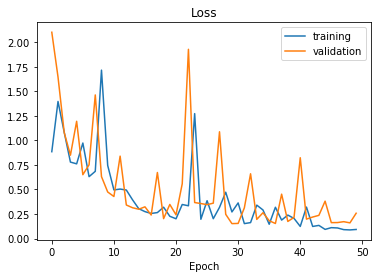

In [359]:
#plot of validation vs training accuracy over the epochs

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [360]:
ypred = model.predict(xtest)


In [361]:

evaluation = model.evaluate(xtest, ytest)
print('Test accuracy : {:.3f}'.format(evaluation[1]))

120/120 [==============================] - 0s 359us/step
Test accuracy : 0.933


In [362]:
for index in range(len(ypred)):
    if ypred[index] > 0.5:
        ypred[index] = 1
    else:
        ypred[index] = 0




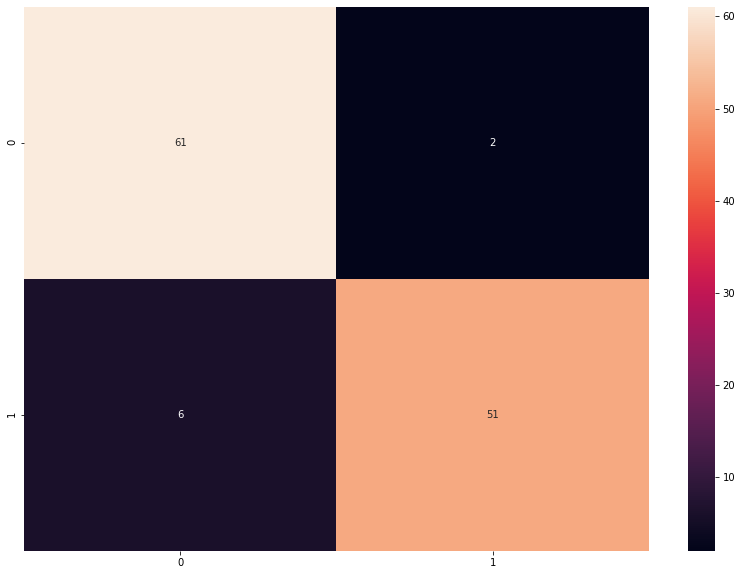

In [363]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(ytest, ypred)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot = True)

In [364]:
from sklearn.metrics import classification_report
 
num_classes = 2
target_names = ['Class {}'.format(i) for i in range(num_classes)]

print(classification_report(ytest, ypred, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.91      0.97      0.94        63
     Class 1       0.96      0.89      0.93        57

    accuracy                           0.93       120
   macro avg       0.94      0.93      0.93       120
weighted avg       0.94      0.93      0.93       120

